In [63]:
using LinearAlgebra
using SparseArrays
using Plots

In [85]:
nx = 1000
ny = 1000;

In [86]:
Γ = 1.0;
dt = 1.0;


Lx = 1
Ly = 1
dx = Lx/nx
dy = Ly/ny



xfactor = Γ*dt/2/dx^2
yfactor = Γ*dt/2/dy^2;

In [87]:
Tx = range(0+0.5Lx/nx,Lx-0.5Lx/nx,length=nx)'  # note ': this is a row vector
Ty = range(0+0.5Ly/ny,Ly-0.5Ly/ny,length=ny)
Tvalue =  @. sin(2*pi*Tx) * cos(2*pi*Ty);

In [88]:
Tvalue'

1000×1000 Adjoint{Float64,Array{Float64,2}}:
  0.00314157   0.00314145   0.0031412   …   0.00314145   0.00314157
  0.00942459   0.00942422   0.00942348      0.00942422   0.00942459
  0.0157072    0.0157066    0.0157054       0.0157066    0.0157072
  0.0219893    0.0219884    0.0219867       0.0219884    0.0219893
  0.0282704    0.0282693    0.0282671       0.0282693    0.0282704
  0.0345505    0.0345491    0.0345464   …   0.0345491    0.0345505
  0.0408292    0.0408275    0.0408243       0.0408275    0.0408292
  0.0471062    0.0471044    0.0471006       0.0471044    0.0471062
  0.0533814    0.0533793    0.0533751       0.0533793    0.0533814
  0.0596545    0.0596522    0.0596475       0.0596522    0.0596545
  0.0659253    0.0659227    0.0659175   …   0.0659227    0.0659253
  0.0721934    0.0721906    0.0721849       0.0721906    0.0721934
  0.0784587    0.0784556    0.0784494       0.0784556    0.0784587
  ⋮                                     ⋱               
 -0.0721934   -0.0721906 

In [142]:
Tvecy = vcat(Tvalue...);
Tvecx = hcat(transpose(Tvalue)...);

In [93]:
N = nx*ny
dl = ones(N-1)
d  = -2ones(N)
dr = dl;


In [136]:
DD = yfactor*Tridiagonal(dl,d,dr)

@time DDTy = DD*Tvecy
DDs = sparse(DD)
@time DDTys = DDs*Tvecy
DDTx = DD*Tvecx

T2Dy = reshape(Tvecy,ny,nx)
T2Dx = reshape(Tvecx,nx,ny)

  0.006653 seconds (2 allocations: 7.629 MiB)
  0.008632 seconds (2 allocations: 7.629 MiB)


1000×1000 Array{Float64,2}:
  0.00314157   0.00314145   0.0031412   …   0.00314145   0.00314157
  0.00942459   0.00942422   0.00942348      0.00942422   0.00942459
  0.0157072    0.0157066    0.0157054       0.0157066    0.0157072
  0.0219893    0.0219884    0.0219867       0.0219884    0.0219893
  0.0282704    0.0282693    0.0282671       0.0282693    0.0282704
  0.0345505    0.0345491    0.0345464   …   0.0345491    0.0345505
  0.0408292    0.0408275    0.0408243       0.0408275    0.0408292
  0.0471062    0.0471044    0.0471006       0.0471044    0.0471062
  0.0533814    0.0533793    0.0533751       0.0533793    0.0533814
  0.0596545    0.0596522    0.0596475       0.0596522    0.0596545
  0.0659253    0.0659227    0.0659175   …   0.0659227    0.0659253
  0.0721934    0.0721906    0.0721849       0.0721906    0.0721934
  0.0784587    0.0784556    0.0784494       0.0784556    0.0784587
  ⋮                                     ⋱               
 -0.0721934   -0.0721906   -0.0721849     

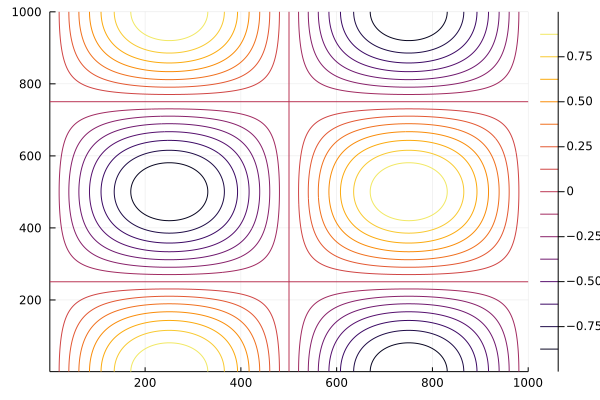

In [95]:
contour(T2Dy)

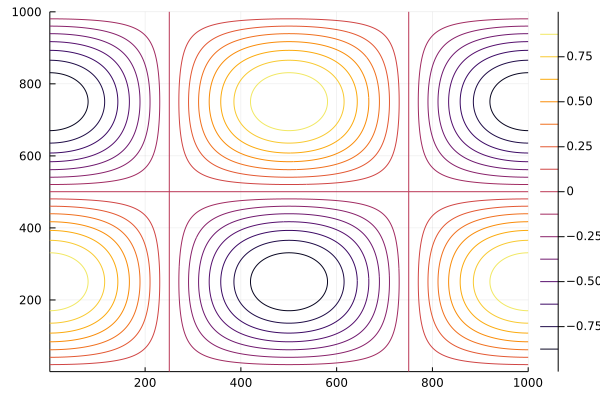

In [96]:
contour(T2Dx)